### JOINS

 🚀 A relational database consists of multiple related tables linking together using common columns, which are known as *foreign key columns*. Because of this, the data in each table is incomplete from the business perspective.

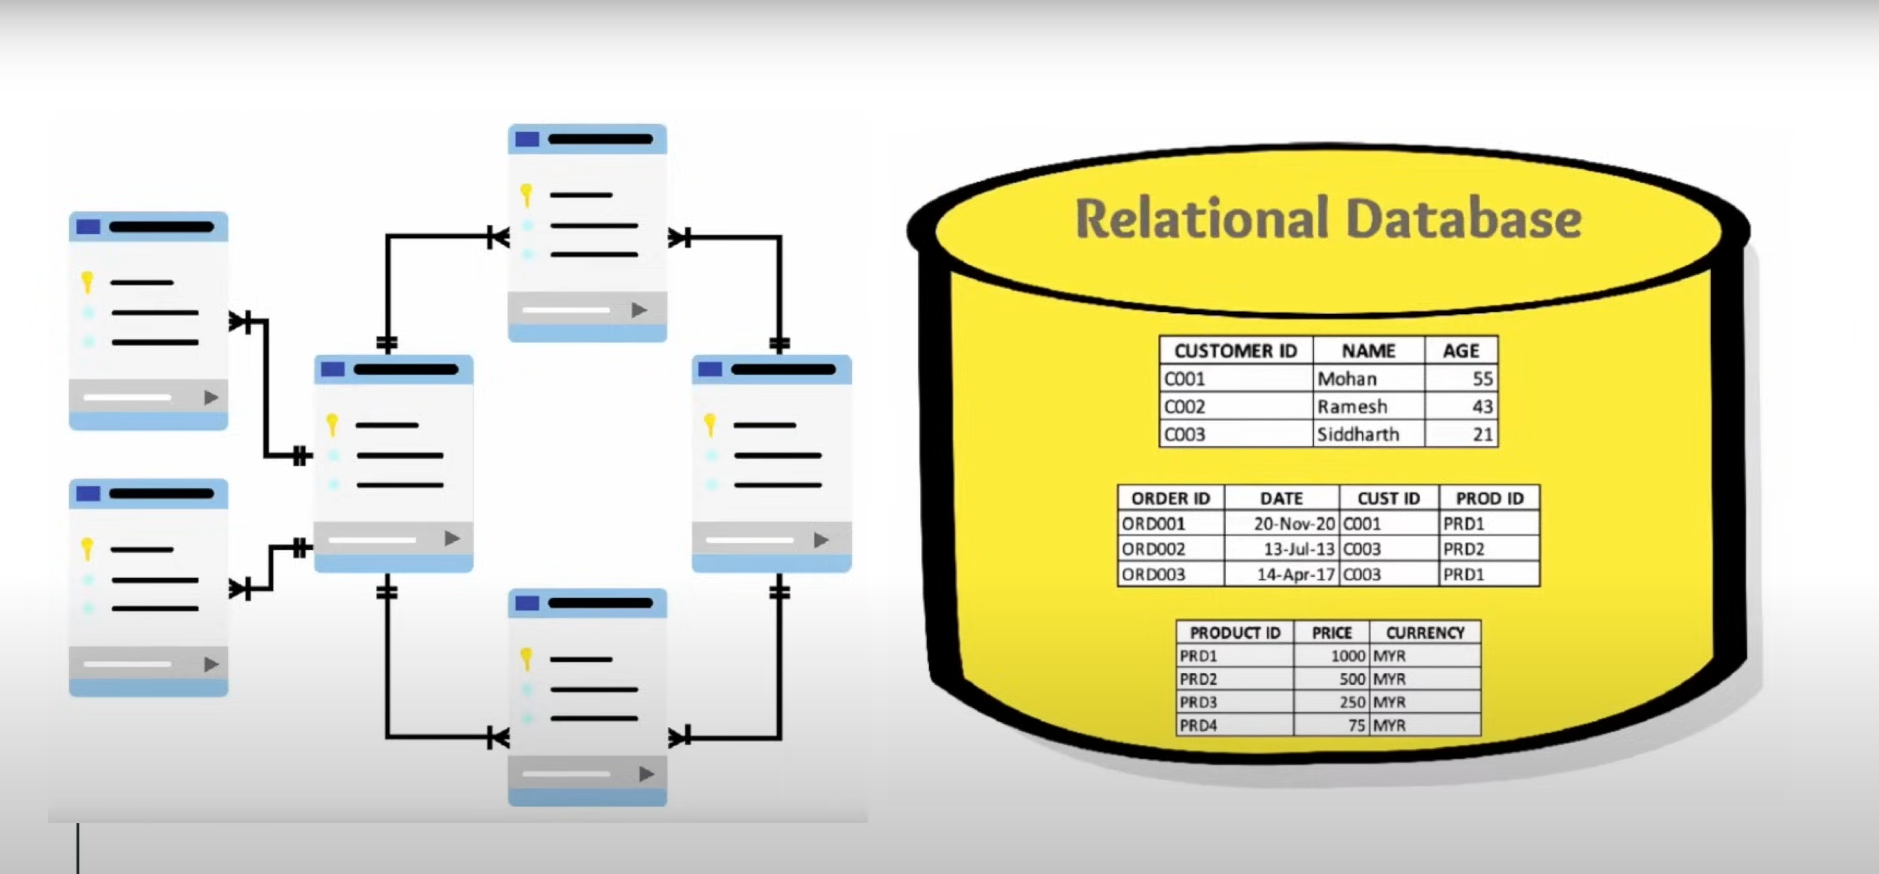

- For example, in the **classicmodels**, we have the orders and orderdetails tables that are linked using the *orderNumber* column:

![](https://www.mysqltutorial.org/wp-content/uploads/2009/12/orders_order_details_tables.png)

- To get complete order information, you need to query data from both orders and  orderdetails tables.



**A join is a method of linking data between one (self-join) or more tables based on the values of the common column between the tables.**

MySQL supports the following types of joins:

 - Inner join
- Left join
- Right join
- Cross join

- To join tables, you use the cross join, inner join, left join, or right join clause.
- The join clause is used in the SELECT statement appeared after the FROM clause.

**Note that MySQL hasn’t supported the FULL OUTER JOIN yet.**




### 🙌Excercise 🙌

- First, create two tables called members and committees

```sql
CREATE TABLE members (
    member_id INT AUTO_INCREMENT,
    name VARCHAR(100),
    PRIMARY KEY (member_id)
);

CREATE TABLE committees (
    committee_id INT AUTO_INCREMENT,
    name VARCHAR(100),
    PRIMARY KEY (committee_id)
);
```

Second, insert some rows into the tables members and committees

```sql
INSERT INTO members(name)
VALUES('John'),('Jane'),('Mary'),('David'),('Amelia');

INSERT INTO committees(name)
VALUES('John'),('Mary'),('Amelia'),('Joe');
```

### INNER JOIN clause

```sql
SELECT
    select_list
FROM t1
INNER JOIN t2 ON join_condition1
INNER JOIN t3 ON join_condition2
...;
```

- The inner join clause joins two tables based on a condition which is known as a join predicate.

- The inner join clause compares each row from the first table with every row from the second table.

- If values from both rows satisfy the join condition, the inner join clause creates a new row whose column contains all columns of the two rows from both tables and includes this new row in the result set.
- **In other words, the inner join clause includes only matching rows from both tables**


- If the join condition uses the equality operator (=) and the column names in both tables used for matching are the same, and you can use the USING clause instead:

```sql
SELECT column_list
FROM table_1
INNER JOIN table_2 USING (column_name);
```


**The INNER JOIN matches each row in one table with every row in other tables and allows you to query rows that contain columns from both tables.**

#### Example

![](https://www.mysqltutorial.org/wp-content/uploads/2019/08/products-productlines-tables.png)

- In this diagram, the table products has the column **productLine** that references the column  productline of the table productlines . 
- The column productLine in the table products is called the foreign key column.

- Typically, you join tables that have foreign key relationships like the  productlines and products tables.

Suppose you want to get:

    The productCode and productName from the products table.
    The textDescription of product lines from the productlines table.

To do this, you need to select data from both tables by matching rows based on values in the productline column using the INNER JOIN clause.


```sql

SELECT 
    productCode, 
    productName, 
    textDescription
FROM
    products t1
INNER JOIN productlines t2 
    ON t1.productline = t2.productline;
```


Because the joined columns of both tables have the same name  productline, you can use the **USING**

```sql
SELECT 
    productCode, 
    productName, 
    textDescription
FROM
    products
INNER JOIN productlines USING (productline);
```

#### MySQL INNER JOIN with GROUP BY clause example

![](https://www.mysqltutorial.org/wp-content/uploads/2019/08/orders-orderdetails-table.png)


This query returns order number, order status, and total sales from the orders and orderdetails tables using the INNER JOIN clause with the GROUP BYclause:


```sql
SELECT 
    t1.orderNumber,
    t1.status,
    SUM(quantityOrdered * priceEach) total
FROM
    orders t1
INNER JOIN orderdetails t2 
    ON t1.orderNumber = t2.orderNumber
GROUP BY orderNumber;
```

#### MySQL INNER JOIN – join three tables example

![image.png](attachment:image.png)

```sql

SELECT 
    o.orderNumber,
    o.orderDate,
    od.orderLineNumber,
    p.productName,
    od.quantityOrdered,
    od.priceEach
FROM
    orders o
INNER JOIN orderdetails od
	ON o.orderNumber = od.ordernumber
INNER JOIN products p 
	ON p.productCode = od.productCode
ORDER BY 
    o.orderNumber, 
    od.orderLineNumber;
    
--    USING clause 
SELECT 
    orderNumber,
    orderDate,
    orderLineNumber,
    productName,
    quantityOrdered,
    priceEach
FROM
    orders
INNER JOIN
    orderdetails USING (orderNumber)
INNER JOIN
    products USING (productCode)
ORDER BY 
    orderNumber, 
    orderLineNumber;
```

#### MySQL INNER JOIN – join four tables example

![image.png](attachment:image.png)

```sql
SELECT 
    orderNumber,
    orderDate,
    customerName,
    orderLineNumber,
    productName,
    quantityOrdered,
    priceEach
FROM
    orders
INNER JOIN orderdetails 
    USING (orderNumber)
INNER JOIN products 
    USING (productCode)
INNER JOIN customers 
    USING (customerNumber)
ORDER BY 
    orderNumber, 
    orderLineNumber;
```

## Exercise

```sql
SELECT 
    orderNumber, 
    productName, 
    msrp, 
    priceEach
FROM
    products p
INNER JOIN orderdetails o 
   ON p.productcode = o.productcode
      AND p.msrp > o.priceEach
WHERE
    p.productcode = 'S10_1678';
```

### MySQL LEFT JOIN clause

- Similar to an inner join, a left join also requires a join predicate.
- When joining two tables using a left join, the concepts of left and right tables are introduced.
<br>


- The left join selects data starting from the left table. For each row in the left table, the left join compares with every row in the right table.

- If the values in the two rows satisfy the join condition, the left join clause creates a new row whose columns contain all columns of the rows in both tables and includes this row in the result set.

- **If the values in the two rows are not matched, the left join clause still creates a new row whose columns contain columns of the row in the left table and NULL for columns of the row in the right table.**


*In other words, the left join selects all data from the left table whether there are matching rows exist in the right table or not.*

*In case there are no matching rows from the right table found, the left join uses NULLs for columns of the row from the right table in the result set.*


```sql
SELECT column_list
FROM table_1
LEFT JOIN table_2 ON join_condition;

-- The left join also supports the USING clause if the column used for matching in both tables is the same:

SELECT column_list
FROM table_1
LEFT JOIN table_2 USING (column_name);
```

**Example**

The following example uses a left join clause to join the members with the committees table:

```sql
SELECT
    m.member_id,
    m.name AS member,
    c.committee_id,
    c.name AS committee
FROM
    members m
LEFT JOIN committees c USING(name);
```
![](https://www.mysqltutorial.org/wp-content/uploads/2019/08/mysql-join-left-join.png)




#### Question
- To find members who are not the committee members


#### Using MySQL LEFT JOIN clause to join two tables

- See the following tables customers and orders in **classicmodels**

- Each customer can have zero or more orders, whereas each order must belong to one customer.

![image.png](attachment:image.png)


The following query uses the LEFT JOIN clause to find all customers and their corresponding orders:

```sql
SELECT
    c.customerNumber,
    customerName,
    orderNumber,
    status
FROM
    customers c
LEFT JOIN orders o 
    ON c.customerNumber = o.customerNumber;
```

In this example:

    - The customers is the left table and orders is the right table.
    - The LEFT JOIN clause returns all customers including the customers who have no order. If a customer has no order, the values in the column orderNumber and status are NULL.


Since both the customers and orders tables share the same column name ( customerNumber) in the join condition using the equal operator, you can utilize the USING syntax 

```sql
SELECT
	customerNumber,
	customerName,
	orderNumber,
	status
FROM
	customers
LEFT JOIN orders USING (customerNumber);


--  The following clauses are equivalent
USING (customerNumber)

ON c.customerNumber = o.customerNumber
```

#### MySQL LEFT JOIN clause to find unmatched rows


*The LEFT JOIN clause is very useful when you need to identify **rows in a table that doesn’t have a matching row** from another table.*

*The following example uses the LEFT JOIN to find customers without any orders*

```sql
SELECT 
    c.customerNumber, 
    c.customerName, 
    o.orderNumber, 
    o.status
FROM
    customers c
LEFT JOIN orders o 
    ON c.customerNumber = o.customerNumber
WHERE
    orderNumber IS NULL;
```


#### MySQL LEFT JOIN to join three tables
- See the following three tables employees, customers, and payments

![image.png](attachment:image.png)

```sql
SELECT 
    lastName, 
    firstName, 
    customerName, 
    checkNumber, 
    amount
FROM
    employees
LEFT JOIN customers ON 
    employeeNumber = salesRepEmployeeNumber
LEFT JOIN payments ON 
    payments.customerNumber = customers.customerNumber
ORDER BY 
    customerName, 
    checkNumber;
```


**How it works.**

- The first LEFT JOIN returns all employees and customers who represented each employee or NULL if the employee is not in charge of any customer.

- The second LEFT JOIN retrieve payments for each customer represented by an employee or returns NULL if the customer has no payments.

### Condition in WHERE clause vs. ON clause
- The following example uses the LEFT JOIN clause to query data from the orders and  orderDetails tables

```sql

SELECT 
    orderNumber, 
    customerNumber, 
    productCode
FROM
    orders
LEFT JOIN orderDetails 
    USING (orderNumber);

-------------displaying only particular ordernumber details----------------
-- The query returns the order and its line items of the order number 10123

SELECT 
    orderNumber, 
    customerNumber, 
    productCode
FROM
    orders
LEFT JOIN orderDetails 
    USING (orderNumber)
WHERE
    orderNumber = 10123;
    
```

**However, if you move the condition from the WHERE clause to the ON clause:**

```sql
SELECT 
    o.orderNumber, 
    o.customerNumber, 
    d.productCode
FROM
    orders o
LEFT JOIN orderDetails d 
    ON o.orderNumber = d.orderNumber AND 
       o.orderNumber = 10123;
```

- It will have a different meaning.

- In this case, the query returns all orders; However, only the order 10123 will have associated line items as shown in the query result 

![image.png](attachment:image.png)


### MySQL RIGHT JOIN clause

- The right join clause is similar to the left join clause except that the treatment of left and right tables is reversed. - The right join starts selecting data from the right table instead of the left table.


- The right join clause **selects all rows from the right table and matches rows in the left table**.

- If a row from the right table does not have matching rows from the left table, the column of the left table will have NULL in the final result set.

**syntax**

```sql

SELECT column_list
FROM table_1
RIGHT JOIN table_2 ON join_condition;

-- Similar to the left join clause, the right clause also supports the USING syntax:

SELECT column_list
FROM table_1
RIGHT JOIN table_2 USING (column_name);


```

**Example**

- This statement uses the right join to join the members and committees tables:

```sql
SELECT
    m.member_id,
    m.name AS member,
    c.committee_id,
    c.name AS committee
FROM
    members m
RIGHT JOIN committees c on c.name = m.name;
```

![](https://www.mysqltutorial.org/wp-content/uploads/2019/08/mysql-join-right-join.png)

#### Question
- To find the committee members who are not in the members table


#### Simple MySQL RIGHT JOIN example

- We’ll use the tables employees and customers

![image.png](attachment:image.png)


- The column **salesRepEmployeeNumber** in the table customers links to the column **employeeNumber** in the employees table.

- A sales representative, or an employee, may be in charge of zero or more customers. And each customer is taken care of by zero or one sales representative.

- If the value in the column salesRepEmployeeNumber is NULL, which means the customer does not have any sales representative.

```sql
SELECT 
    employeeNumber, 
    customerNumber
FROM
    customers -- left table
RIGHT JOIN employees -- right table
    ON salesRepEmployeeNumber = employeeNumber -- join condition
ORDER BY 
	employeeNumber;
```


**In this example**:
- The RIGHT JOIN returns all rows from the table employees whether rows in the table employees have matching values in the column salesRepEmployeeNumber of the table customers.

- If a row from the table employees has no matching row from the table customers , the RIGHT JOIN uses NULL for the customerNumber column.



####  Using MySQL RIGHT JOIN to find unmatching rows

- The following statement uses the RIGHT JOIN clause to find employees who are not in charge of any customers:

```sql
SELECT 
    employeeNumber, 
    customerNumber
FROM
    customers
RIGHT JOIN employees ON 
	salesRepEmployeeNumber = employeeNumber
WHERE customerNumber is NULL
ORDER BY employeeNumber;
```


### Summary
- MySQL RIGHT JOIN allows you to query data from two or more related tables.
- The RIGHT JOIN starts selecting rows from the right table. It always returns rows from the right table whether or not there are matching rows in the left table.
- The RIGHT OUTER JOIN is the synonym of the RIGHT JOIN.

### MySQL CROSS JOIN clause

- Unlike the inner join, left join, and right join, the cross join clause does not have a join condition.

- The cross join makes a Cartesian product of rows from the joined tables.
- **The cross join combines each row from the first table with every row from the right table to make the result set.**

**syntax**
```sql
SELECT select_list
FROM table_1
CROSS JOIN table_2;
```

**Example**
```sql
SELECT
    m.member_id,
    m.name AS member,
    c.committee_id,
    c.name AS committee
FROM
    members m
CROSS JOIN committees c;
```

- The cross join is useful for generating planning data.
- For example, you can carry the sales planning by using the cross join of customers, products, and years




## MYSQL SUB-QUERIES

    In SQL a Subquery can be simply defined as a query within another query.
    In other words we can say that a Subquery is a query that is embedded in WHERE clause of another SQL query.

Important Rules

- You can place the Subquery in a number of SQL clauses: WHERE clause, HAVING clause, FROM clause


- Subqueries can be used with SELECT, UPDATE, INSERT, DELETE statements along with expression operator. It could be equality operator or comparison operator such as =, >, =, <= and Like operator.

- A subquery is a query within another query. The outer query is called as main query and inner query is called as subquereries.


- The subquery generally executes first when the subquery doesn’t have any co-relation with the main query, when there is a co-relation the parser takes the decision on the fly on which query to execute on precedence and uses the output of the subquery accordingly.


- Subquery must be enclosed in parentheses


- Subqueries are on the right side of the comparison operator.

- ORDER BY command cannot be used in a Subquery. GROUPBY command can be used to perform same function as ORDER BY command.


- Use single-row operators with singlerow Subqueries. Use multiple-row operators with multiple-row Subqueries.


#### SYNTAX

**NOTE**: Create a employee table with following fields (ID	NAME	AGE	ADDRESS	SALARY)

##### with SELECT  Statement
```sql

SELECT column_name
FROM table_name
WHERE column_name expression operator
 (SELECT COLUMN_NAME  from TABLE_NAME   WHERE ... );


SELECT *   
FROM EMPLOYEE  
WHERE ID IN (
SELECT ID  FROM EMPLOYEE   WHERE SALARY > 4500 );  
```

-------------------------------------------------------------

##### with the INSERT Statement

```sql

INSERT INTO table_name (column1, column2, column3....)   
SELECT *  
FROM table_name  
WHERE VALUE OPERATOR


INSERT INTO EMPLOYEE_BKP  
   SELECT * FROM EMPLOYEE   
   WHERE ID IN (SELECT ID   
   FROM EMPLOYEE);  

```

--------------------------------------------------------

##### with the UPDATE Statement
```sql

UPDATE table  
SET column_name = new_value  
WHERE VALUE OPERATOR  
   (SELECT COLUMN_NAME  
   FROM TABLE_NAME  
   WHERE condition);  



UPDATE EMPLOYEE  
   SET SALARY = SALARY * 0.25  
   WHERE AGE IN (SELECT AGE FROM CUSTOMERS_BKP  
      WHERE AGE >= 29);  
```

---------------------------------------------------------------

##### with the DELETE Statement

```sql

DELETE FROM TABLE_NAME  
WHERE VALUE OPERATOR  
   (SELECT COLUMN_NAME  
   FROM TABLE_NAME  
   WHERE condition);   

DELETE FROM EMPLOYEE  
   WHERE AGE IN (SELECT AGE FROM EMPLOYEE_BKP  
      WHERE AGE >= 29 );  
```

### EXAMPLES

    Display Highest salared employee name from employees table.
    Display second highest salary from employee table.
    Display second highest salaried employee name from employee table;





### TYPES OF SUB-QUERIES
- What is Sub Query? How does SQL process a statement containing sub-query?

EXAMPLE

**QUESTION: Find the employees who's salary is more than the avg salary earned by all employees?**


### 1.Scalar SubQuery: always returns one ROW & one COLUMN
- we can use in SELECT , FROM, INSERT, UPDATE clause
- always inner query returns one row & one column

```sql
SELECT *  -- outer query
FROM employees
WHERE salary > ( SELECT avg(salary) FROM employees); -- inner query


SELECT *
FROM employees e1
JOIN ( SELECT avg(salary) AS sal FROM employees ) e2
ON e1.salary > e2.sal


```

### 2. MultipleRow SubQuery
- subquery which returns multiple column and multiple rows
- subquery which returns only 1 column and multiple rows

EXAMPLE:

**QUESTION : Find the employees who earns the highest salary in each department?**

```sql
select dept_name, max(salary)
from employees
group by dept_name


select *
from employees
where (dept_name, salary) IN (
select dept_name, max(salary)
from employees
group by dept_name
);
```




**single column & multiple rows**

Q: Find Department which doesn't have any employees

```sql
SELECT *
FROM department
WHERE dept_name NOT IN (SELECT DISTINCT dept_name FROM employees);
```



### 3. Correlated subquery
- A sub-query which is related to the outer query
- processing will be different
- processing of sub-query will relate values return from outer query
- processing of sub-query will depend on values that are return from outer query

**In scalar, Multirow subquery, subqueries are independent, we can execute as individual**

Q:  Find the employees in each department who earns more than the average salary in that department?

```sql

-- using JOIN 
select dept_name, avg(salary) as avgsal from employees group by dept_name;

select e1.*, e2.avgsal from employees e1
JOIN (select dept_name, avg(salary) as avgsal from employees group by dept_name) e2
ON e1.dept_name = e2.dept_name AND e1.salary > e2.avgsal;



SELECT * FROM employees e1
where salary > (
	SELECT avg(salary) FROM employees e2
	where ie2.dept_name = e1.dept_name
);


```

## Different SQL clauses Where sub query is allowed 

- SELECT 
- FROM 
- WHERE 
- HAVING 


### Using subquery in SELECT clause 
* QUESTION : Fecth all employee details and add remarks to those employees who earns more than the average pay.*

```sql
SELECT *,
       ( CASE
           WHEN salary > (SELECT avg(salary)
                          FROM   employees) THEN 'Higher than avg'
           ELSE NULL
         end ) AS remarks
FROM   employees; 
```


### HAVING 
* QUESTION: Find the employees who have sold more units than average units sold by all stores*

```sql
SELECT store_name,
       sum(quantity) AS total_sales
FROM   sales
GROUP  BY store_name
HAVING total_sales > (SELECT avg(quantity)
                      FROM   sales);  
 
```

## Different SQL statements Where sub query is allowed

- INSERT
- DELETE 
- UPDATE 


### INSERT 
- In every database, for tables employees, orders, payments etc will maintain history tables for keeping the track of records.

-  * QUESTION: Insert data into employee history table, make sure not insert duplicate records *

```sql
INSERT INTO employee_history
SELECT e.empid,
       e.empname,
       e.deptname,
       e.salary,
       d.location
FROM   employees e
       JOIN department d
         ON d.deptname = e.deptname
WHERE  NOT EXISTS (SELECT 1
                   FROM   employee_history eh
                   WHERE  eh.empid = e.empid);  
```


### UPDATE 

* QUESTION: Give 10% increment to all employees in Banglore location
 * Based on the maximum salary earned by an employee in each department.
 * Consider only employees in employee history table*
 
 

```sql
UPDATE employees e
SET    salary = (SELECT max(salary) + max(salary) * 0.1 AS inc
                 FROM   employee_history eh
                 WHERE eh.deptName = e.deptName)

where e.deptName IN (SELECT deptName FROM department
					WHERE location = 'Bangalore')

AND e.empId IN (SELECT empId from  employee_history);   
```

### DELETE 
* QUESTION: Delete all departments who do not have any employees*

```sql
DELETE FROM department
WHERE deptName IN(SELECT deptName
                  FROM department d
                  WHERE NOT EXISTS (SELECT 1 FROM employees e where e.deptName=d.deptName))
```


### CREATE INDEX

- INDEX ( B tree data structure)
- Indexes are use to retrive data from table very fast.
- MySQL normally searches sequentially through a column.
- The loger the column, the more expensive the operations is.
- The CREATE INDEX command use used to create indexes on tables

- UPDATE takes more time, SELECT takes less time.


*Note:* Updating the table with indexes takes a lot of time than updating a table without indexes. It is
because the indexes also need an update. So, only create indexes on those columns that will be
frequently searched against

```sql

-- It creates an index on a table. Duplicate values are allowed:
CREATE INDEX index_name
ON table_name (column1, column2, ...);


CREATE INDEX orderNumber_idx ON orders(orderNumber);

CREATE INDEX empId_idx ON employees(empId);

CREATE INDEX empName_deptName_idx ON employees(empName,deptName);

-- displays indexes of a table
SHOW INDEXES FROM tableName;


-- drop a index from table

ALTER TABLE tableName DROP INDEX index_name;


```

### Functions

- A function in MySQL is a pre-defined or user-defined routine that performs a specific task and returns a value.

- **Types**: MySQL supports various types of functions,
    including built-in functions (e.g., mathematical functions, string functions)
    and user-defined functions.

- **Purpose**: Functions are used to perform calculations, manipulate data, format output, and simplify complex queries.

- **Built-in Functions**:

        Mathematical Functions: SUM(), AVG(), MAX(), MIN(), etc.
        String Functions: CONCAT(), SUBSTRING(), CHAR_LENGTH(), etc.
        Date and Time Functions: NOW(), DATE_FORMAT(), TIMESTAMPDIFF(), etc.
        Aggregate Functions: Used with GROUP BY clauses, e.g., COUNT(), GROUP_CONCAT().
        Control Flow Functions: IF(), CASE WHEN, etc.

- **User-Defined Functions (UDFs)**:

    Developers can create their own functions using the CREATE FUNCTION statement.
    These functions are defined in SQL and can encapsulate custom logic.

- **Parameters**:

    Functions can accept parameters, allowing them to be flexible and perform operations on different inputs.

- **Return Value**:

    Functions return a value, which can be a scalar value, a table, or a result set.
    
    
**Example of Built-in Function**

```sql
SELECT CONCAT(first_name, ' ', last_name) AS full_name FROM employees;
```

**Example of User-Defined Function**

```sql
DELIMITER //

CREATE FUNCTION calculate_area(radius INT)
RETURNS DOUBLE
BEGIN
    DECLARE area DOUBLE;
    SET area = 3.14 * radius * radius;
    RETURN area;
END //

DELIMITER ;

```

### Stored Procedures

*A stored procedure in MySQL is a **set of SQL statements that can be stored in the database and executed later**.*

    Definition: A stored procedure is a precompiled collection of one or more SQL statements that are stored on the database server.

    Encapsulation: It encapsulates a series of SQL statements and procedural logic, providing a way to execute multiple commands as a single unit.

    Execution: Stored procedures are executed on the server, which reduces the amount of data transferred between the client and the server, improving performance.

    Parameters: Stored procedures can take input parameters and return output parameters, making them flexible for various scenarios.

    Reuse: Once created, stored procedures can be reused by multiple applications or parts of an application.

    Security: Stored procedures can help enhance security by allowing controlled access to data. Users can execute a stored procedure without having direct access to the underlying tables.

    Modularity: They promote modularity in database development by allowing developers to break down complex tasks into manageable, reusable units.

    Transaction Control: Stored procedures can include transaction control statements (BEGIN, COMMIT, ROLLBACK), allowing for better control over database transactions.

    Performance: The precompiled nature of stored procedures can lead to improved performance compared to executing individual SQL statements.

    Maintenance: Centralized management of logic within stored procedures simplifies maintenance and updates, as changes can be made in one place.
    
    

```sql
DELIMITER //

CREATE PROCEDURE sp_example(IN input_param INT)
BEGIN
    -- SQL statements and procedural logic here
    SELECT * FROM example_table WHERE column_name = input_param;
END //

DELIMITER ;
```